In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [171]:
data = pd.read_csv('loan_approval_dataset.csv')
df = data.copy()
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [172]:
df = df.drop('loan_id', axis = 1)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [173]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [175]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [176]:

cat = df.select_dtypes(exclude = "number")
num = df.select_dtypes(include = 'number')

print('Numerical Data')
display(num.head())
print(f'\n\nCategorical Data')
display(cat.head())

Numerical Data


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000




Categorical Data


,education,self_employed,loan_status
0,Graduate,No,Approved
1,Not Graduate,Yes,Rejected
2,Graduate,No,Rejected
3,Graduate,No,Rejected
4,Not Graduate,Yes,Rejected


In [177]:
new_cat = df.select_dtypes(exclude = "number")
new_num = df.select_dtypes(include = 'number')

print('Numerical Data')
display(new_num.head())
print(f'\n\nCategorical Date')
display(new_cat.head())

Numerical Data


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000




Categorical Date


,education,self_employed,loan_status
0,Graduate,No,Approved
1,Not Graduate,Yes,Rejected
2,Graduate,No,Rejected
3,Graduate,No,Rejected
4,Not Graduate,Yes,Rejected


In [178]:
columns_to_scale = []
for i in new_num.columns:
    if df[i].describe()[2] > 1500:
        columns_to_scale.append(i)

columns_to_scale

[' income_annum',
 ' loan_amount',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value']

In [179]:
from sklearn.preprocessing import StandardScaler
import joblib

scaled = {}

for i in columns_to_scale:
    scale = StandardScaler()
    df[i] = scale.fit_transform(df[[i]])
    joblib.dump(scale, open(f'{i}_scaler.pkl', 'wb'))
    scaled[i + '_scaler'] = scale

scaled

{' income_annum_scaler': StandardScaler(),
 ' loan_amount_scaler': StandardScaler(),
 ' residential_assets_value_scaler': StandardScaler(),
 ' commercial_assets_value_scaler': StandardScaler(),
 ' luxury_assets_value_scaler': StandardScaler(),
 ' bank_asset_value_scaler': StandardScaler()}

In [180]:
from sklearn.preprocessing import LabelEncoder

encoded = {}  
for i in cat.columns: 
    encode = LabelEncoder() 
    df[i] = encode.fit_transform(df[i])
    joblib.dump(encode, open(f'{i}_encoder.pkl', 'wb'))
    encoded[i +'_encoder'] = encode

encoded

{' education_encoder': LabelEncoder(),
 ' self_employed_encoder': LabelEncoder(),
 ' loan_status_encoder': LabelEncoder()}

In [181]:
def plotter(dataframe, col1, col2, col3, dependent):
    sns.set(style = 'darkgrid')
    plt.figure(figsize = (20,4))

    plt.subplot(1,3,1)
    sns.countplot(x = dataframe[col1], hue = dataframe[dependent])
    plt.title(f"Relationship Btw {col1} and {dependent} is {dataframe[dependent].corr(dataframe[col1]).round(2)}")

    plt.subplot(1,3,2)
    sns.countplot(x = dataframe[col2], hue = dataframe[dependent])
    plt.title(f"Relationship Btw {col2} and {dependent} is {dataframe[dependent].corr(dataframe[col2]).round(2)}")

    plt.subplot(1,3,3)
    sns.countplot(x = dataframe[col3], hue = dataframe[dependent])
    plt.title(f"Relationship Btw {col3} and {dependent} is {dataframe[dependent].corr(dataframe[col3]).round(2)}")


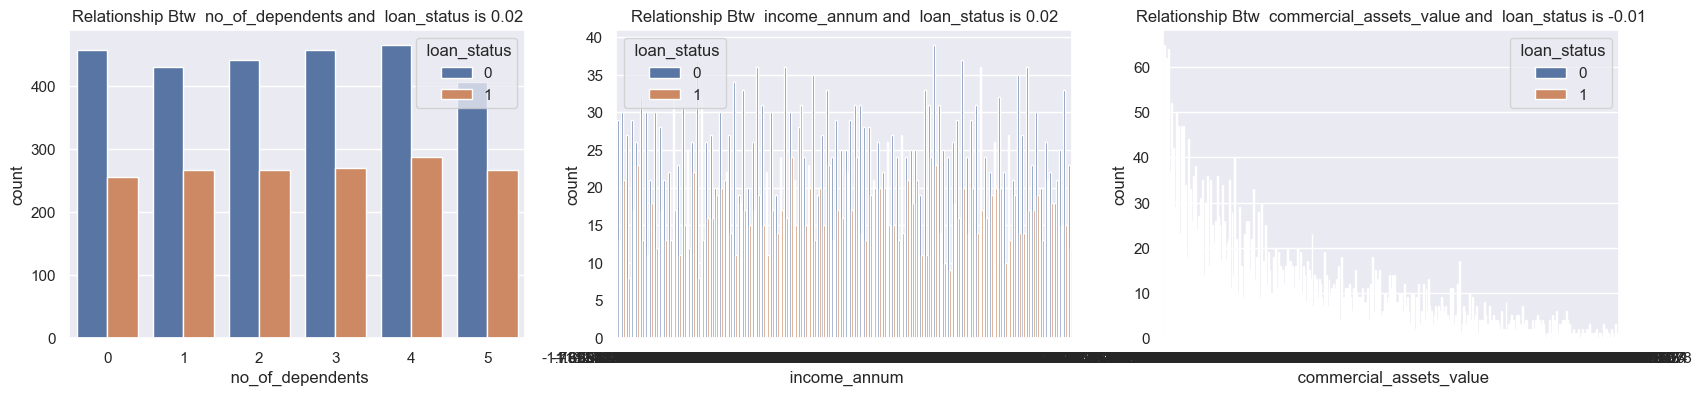

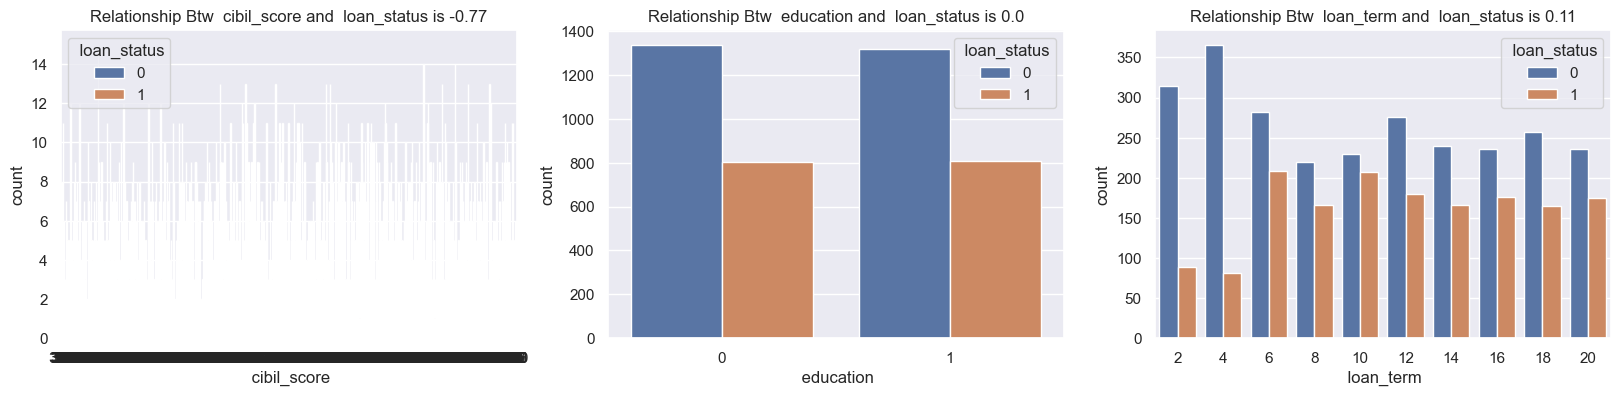

In [182]:
plotter(df, ' no_of_dependents', ' income_annum', ' commercial_assets_value', ' loan_status')
plotter(df, ' cibil_score', ' education', ' loan_term', ' loan_status')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

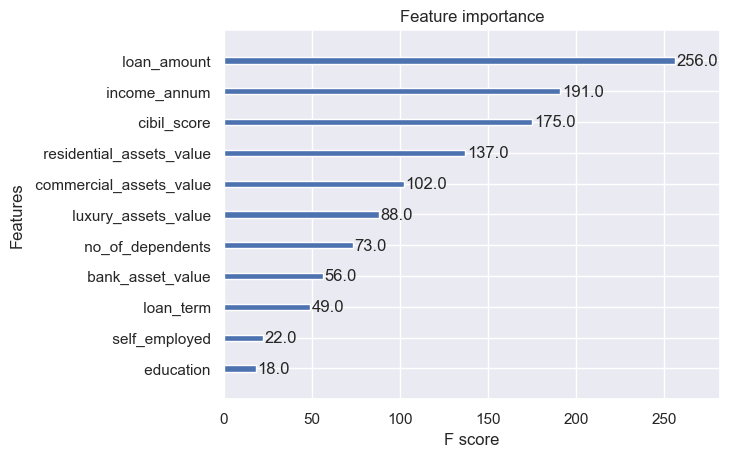

In [183]:
import matplotlib.pyplot as plt
import xgboost as xgb

model = xgb.XGBClassifier()

x = df.drop(' loan_status', axis = 1)
y = df[' loan_status']

model.fit(x, y)
xgb.plot_importance(model, importance_type = 'weight')

In [184]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [185]:
sel_cols = [' loan_amount', ' income_annum',  ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
            ' luxury_assets_value', ' no_of_dependents', ' loan_status']

df = df[sel_cols]
df.head()

,loan_amount,income_annum,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,no_of_dependents,loan_status
0,1.633052,1.617979,778,-0.780058,2.877289,0.832028,2,0
1,-0.324414,-0.341750,417,-0.733924,-0.631921,-0.694993,0,1
2,1.610933,1.439822,506,-0.057300,-0.107818,1.996520,3,1
3,1.721525,1.119139,467,1.649637,-0.381263,0.897943,3,1
4,1.002681,1.689242,382,0.757724,0.735304,1.568075,5,1


In [186]:
from sklearn.model_selection import train_test_split

x = df.drop(' loan_status', axis = 1)
y = df[' loan_status']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 90)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (3415, 7)
Xtest: (854, 7)
Ytrain: (3415,)
Ytest: (854,)


In [193]:
xtrain

,loan_amount,income_annum,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,no_of_dependents
587,-1.253381,-1.410692,508,-1.118369,-0.723069,-1.409068,5
1924,0.527139,-0.021067,748,0.127233,0.803665,-0.420349,0
3323,-0.368651,-0.234855,634,-0.241834,0.530220,0.008096,5
2798,-0.313355,-0.519907,300,-0.349479,-0.449624,-0.090776,0
3700,-0.921607,-0.804958,349,-0.518635,-0.677495,-0.442321,0
...,...,...,...,...,...,...,...
2500,-0.191705,-0.519907,589,-0.595524,-1.133237,-0.431335,0
2727,2.174949,1.439822,836,2.126349,1.350555,1.699904,2
1347,0.759381,0.976613,528,-0.257212,0.872026,1.051744,5
2717,1.467165,1.404190,612,-1.149125,0.507433,1.293431,0


,loan_amount,income_annum,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,no_of_dependents,loan_status
587,-1.253381,-1.410692,508,-1.118369,-0.723069,-1.409068,5,1
1924,0.527139,-0.021067,748,0.127233,0.803665,-0.420349,0,0
3323,-0.368651,-0.234855,634,-0.241834,0.530220,0.008096,5,0
2798,-0.313355,-0.519907,300,-0.349479,-0.449624,-0.090776,0,0
3700,-0.921607,-0.804958,349,-0.518635,-0.677495,-0.442321,0,1
...,...,...,...,...,...,...,...,...
2500,-0.191705,-0.519907,589,-0.595524,-1.133237,-0.431335,0,0
2727,2.174949,1.439822,836,2.126349,1.350555,1.699904,2,0
1347,0.759381,0.976613,528,-0.257212,0.872026,1.051744,5,1
2717,1.467165,1.404190,612,-1.149125,0.507433,1.293431,0,0


<Axes: xlabel=' loan_status', ylabel='count'>

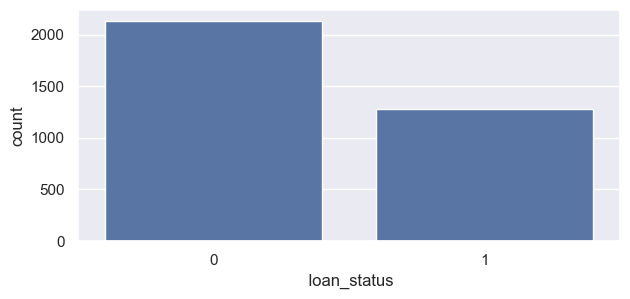

In [187]:
training_data = pd.concat([xtrain, ytrain], axis = 1)
plt.figure(figsize = (7,3))

display(training_data)
sns.countplot(x = training_data[' loan_status'])

In [188]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
xgb_model = xgb.XGBClassifier()

x = training_data.drop(' loan_status', axis = 1)
y = training_data[' loan_status']

xgb_model.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [189]:
from sklearn.metrics import classification_report

cv = xgb_model.predict(xtest)
print(classification_report(cv,ytest))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       504
           1       0.98      0.92      0.95       350

    accuracy                           0.96       854
   macro avg       0.96      0.95      0.96       854
weighted avg       0.96      0.96      0.96       854



In [190]:
model = joblib.dump(xgb_model,open('LoanpredictionModel.pkl','wb'))